In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as s

In [2]:
#Product length is crucial for packaging and storing products efficiently in the warehouse
#This csv consits of amazon products data base with title,bullet points,description,product_type_id ,product id
train_data=pd.read_csv('train.csv')

In [3]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [4]:
#we have over 2 million rows
train_data.shape

(2249698, 6)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2249698 entries, 0 to 2249697
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCT_ID       int64  
 1   TITLE            object 
 2   BULLET_POINTS    object 
 3   DESCRIPTION      object 
 4   PRODUCT_TYPE_ID  int64  
 5   PRODUCT_LENGTH   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 103.0+ MB


In [6]:
train_data[train_data['TITLE'].isna()]
#12 null in title

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
66157,1804,NaN,NaN,NaN,222,507.873000
196485,164542,NaN,NaN,NaN,150,575.000000
420890,16935,NaN,NaN,NaN,6104,290.000000
477469,1362139,NaN,[Top-notch and innovative tremolo pedal offers...,NaN,6632,500.000000
948754,566503,NaN,NaN,NaN,109,555.117000
1144461,678966,NaN,NaN,NaN,1,685.038000
1364032,548186,NaN,NaN,NaN,1,1228.344000
1716822,20369,NaN,NaN,NaN,154,1040.000000
1879925,496531,NaN,NaN,NaN,1,799.211000
1885213,555363,NaN,NaN,NaN,151,846.455000


In [7]:
#as count is null in title is limited we can drop this
train_data.dropna(subset=['TITLE'],inplace=True)

In [8]:
train_data[train_data['TITLE'].isna()]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH


In [9]:
both_na=train_data['DESCRIPTION'].isna()&train_data['BULLET_POINTS'].isna()
# deshc
train_data[both_na]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424
6,413758,Ungifted: My Life and Journey,NaN,NaN,23,598.000
11,833712,La Mure / Valbonnais gps,NaN,NaN,1,433.070
12,648364,J'ecris des lettres! premiers exercices d'écri...,NaN,NaN,1,759.841
13,1991694,Mediterranean diet for beginners: 7Benefits of...,NaN,NaN,32,600.000
...,...,...,...,...,...,...
2249679,111250,When Work Becomes Optional,NaN,NaN,87,600.000
2249681,421168,Learning to Swim,NaN,NaN,12743,525.000
2249682,38572,"Holy Bible: New International Version, Camel/c...",NaN,NaN,129,488.188
2249691,571566,Comedy Wildlife Photography Awards: The perfec...,NaN,NaN,2968,271.250


In [10]:
#droping 783497 makes huge loss of data so filling nan with the previous coloumn value makes sense
#filling bullet points nan value  with title of same row
train_data['BULLET_POINTS'].fillna(train_data['TITLE'],inplace=True)
train_data['DESCRIPTION'].fillna(train_data['TITLE'],inplace=True)
train_data[both_na]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
4,283658,The United Empire Loyalists: A Chronicle of th...,The United Empire Loyalists: A Chronicle of th...,The United Empire Loyalists: A Chronicle of th...,6112,598.424
6,413758,Ungifted: My Life and Journey,Ungifted: My Life and Journey,Ungifted: My Life and Journey,23,598.000
11,833712,La Mure / Valbonnais gps,La Mure / Valbonnais gps,La Mure / Valbonnais gps,1,433.070
12,648364,J'ecris des lettres! premiers exercices d'écri...,J'ecris des lettres! premiers exercices d'écri...,J'ecris des lettres! premiers exercices d'écri...,1,759.841
13,1991694,Mediterranean diet for beginners: 7Benefits of...,Mediterranean diet for beginners: 7Benefits of...,Mediterranean diet for beginners: 7Benefits of...,32,600.000
...,...,...,...,...,...,...
2249679,111250,When Work Becomes Optional,When Work Becomes Optional,When Work Becomes Optional,87,600.000
2249681,421168,Learning to Swim,Learning to Swim,Learning to Swim,12743,525.000
2249682,38572,"Holy Bible: New International Version, Camel/c...","Holy Bible: New International Version, Camel/c...","Holy Bible: New International Version, Camel/c...",129,488.188
2249691,571566,Comedy Wildlife Photography Awards: The perfec...,Comedy Wildlife Photography Awards: The perfec...,Comedy Wildlife Photography Awards: The perfec...,2968,271.250


In [11]:
#no null
train_data[train_data['DESCRIPTION'].isna()]

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH


In [12]:
# null values handled
train_data.isna().sum()

PRODUCT_ID         0
TITLE              0
BULLET_POINTS      0
DESCRIPTION        0
PRODUCT_TYPE_ID    0
PRODUCT_LENGTH     0
dtype: int64

In [13]:
#numeric columns statistics
train_data.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249686e+06,2.249686e+06,2.249686e+06
mean,1.499801e+06,4.000468e+03,4.071857e+03
std,8.661929e+05,3.966149e+03,1.351688e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494882e+05,2.300000e+02,5.118110e+02
50%,1.499564e+06,2.916000e+03,6.630000e+02
75%,2.250669e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [14]:
#range max-min of numeric column
a=train_data['PRODUCT_ID'].max()-train_data['PRODUCT_ID'].min()
b=train_data['PRODUCT_TYPE_ID'].max()-train_data['PRODUCT_TYPE_ID'].min()
c=train_data['PRODUCT_LENGTH'].max()-train_data['PRODUCT_LENGTH'].min()
print(a,b,c)

2999998 13420 1885801399.0


In [15]:
#consists html tags hard to train ml model so
# train_data['TITLE']=(train_data['TITLE'].astype(str))
# print(train_data['TITLE'].dtype)
html=train_data[~train_data['TITLE'].str.contains('<.*?>')]
html

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,ArtzFolio Tulip Flowers Blackout Curtain for D...,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,The United Empire Loyalists: A Chronicle of th...,The United Empire Loyalists: A Chronicle of th...,6112,598.424000
...,...,...,...,...,...,...
2249693,2422167,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,Material : Polyester,Nike Women's As W Ny Df Swsh Hn Kh Bra (CZ7610...,3009,1181.100000
2249694,2766635,"(3PCS) Goose Game Cute Cartoon Enamel Pins, Fu...",[❤ [Inspiration] Inspired by the Untitled Goos...,<p><b>[Brand]: </b>XVIEONR</p> <p><br></p> <p>...,3413,125.984252
2249695,1987786,Kangroo Sweep Movement Printed Wooden Wall Clo...,"[Dial size: 12 inches in diameter,Big, clear r...",Wall Clocks Are Very Attractive In Looks And E...,1574,1200.000000
2249696,1165754,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,Electro Voice EKX-BRKT15 | Wall Mount Bracket ...,592,2900.000000


In [16]:
# #removing html characters from title ,bullet_points,description using re 
import re
CLEANR = re.compile('<.*?>') 

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

train_data["DESCRIPTION"] = train_data["DESCRIPTION"].apply(cleanhtml)
train_data["BULLET_POINTS"] = train_data["BULLET_POINTS"].apply(cleanhtml)
train_data["TITLE"] = train_data["TITLE"].apply(cleanhtml)

In [17]:
train_data.dtypes

PRODUCT_ID           int64
TITLE               object
BULLET_POINTS       object
DESCRIPTION         object
PRODUCT_TYPE_ID      int64
PRODUCT_LENGTH     float64
dtype: object

In [18]:
#convert to lower case
def lower(self):
    s=self.lower()
    return s

train_data["DESCRIPTION"] = train_data["DESCRIPTION"].apply(lower)
train_data["BULLET_POINTS"] = train_data["BULLET_POINTS"].apply(lower)
train_data["TITLE"] = train_data["TITLE"].apply(lower)

In [19]:
train_data.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,artzfolio tulip flowers blackout curtain for d...,[luxurious & appealing: beautiful custom-made ...,artzfolio tulip flowers blackout curtain for d...,1650,2125.980000
1,2673191,marks & spencer girls' pyjama sets t86_2561c_n...,"[harry potter hedwig pyjamas (6-16 yrs),100% c...",marks & spencer girls' pyjama sets t86_2561c_n...,2755,393.700000
2,2765088,priknik horn red electric air horn compressor ...,"[loud dual tone trumpet horn, compatible with ...","specifications: color: red, material: aluminiu...",7537,748.031495
3,1594019,alishah women's cotton ankle length leggings c...,[made by 95%cotton and 5% lycra which gives yo...,aishah women's lycra cotton ankel leggings. br...,2996,787.401574
4,283658,the united empire loyalists: a chronicle of th...,the united empire loyalists: a chronicle of th...,the united empire loyalists: a chronicle of th...,6112,598.424000


(array([729990., 276149., 442187.,  37976., 239380., 134211.,  77490.,
         66988., 128577., 116738.]),
 array([    0.,  1342.,  2684.,  4026.,  5368.,  6710.,  8052.,  9394.,
        10736., 12078., 13420.]),
 <BarContainer object of 10 artists>)

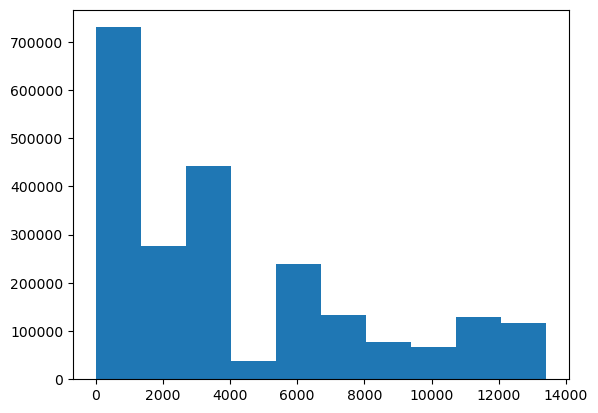

In [20]:
pl.hist(train_data['PRODUCT_TYPE_ID'])


(array([2.249682e+06, 1.000000e+00, 2.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.00000000e+00, 1.88580141e+08, 3.77160281e+08, 5.65740421e+08,
        7.54320561e+08, 9.42900700e+08, 1.13148084e+09, 1.32006098e+09,
        1.50864112e+09, 1.69722126e+09, 1.88580140e+09]),
 <BarContainer object of 10 artists>)

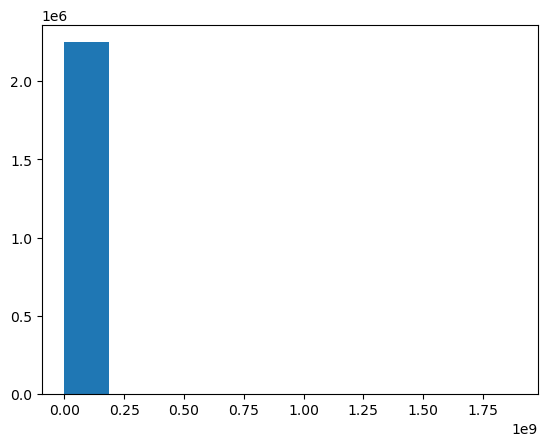

In [21]:
pl.hist(train_data['PRODUCT_LENGTH'])

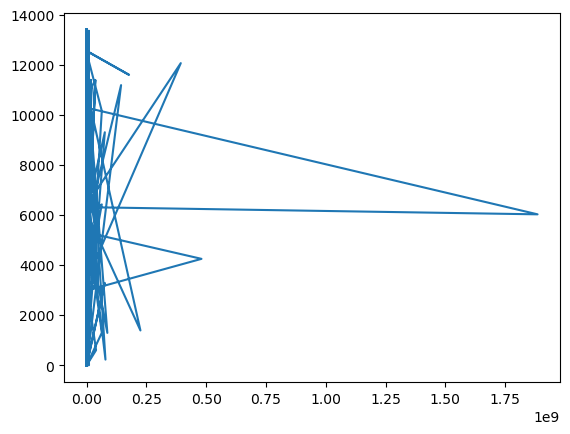

In [22]:
pl.plot(train_data['PRODUCT_LENGTH'],train_data['PRODUCT_TYPE_ID'])

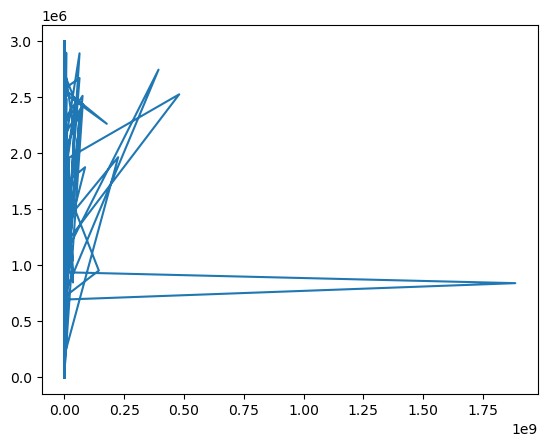

In [23]:
pl.plot(train_data['PRODUCT_LENGTH'],train_data['PRODUCT_ID'])

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRODUCT_TYPE_ID', ylabel='PRODUCT_LENGTH'>

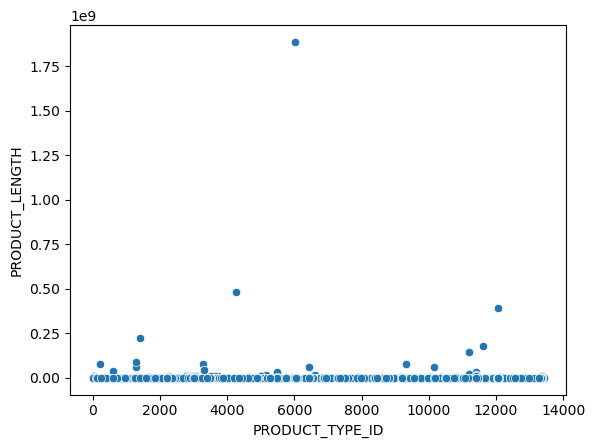

In [24]:
s.scatterplot(train_data['PRODUCT_TYPE_ID'],train_data['PRODUCT_LENGTH'])

In [25]:
import warnings

C:\Users\shash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PRODUCT_ID', ylabel='PRODUCT_LENGTH'>

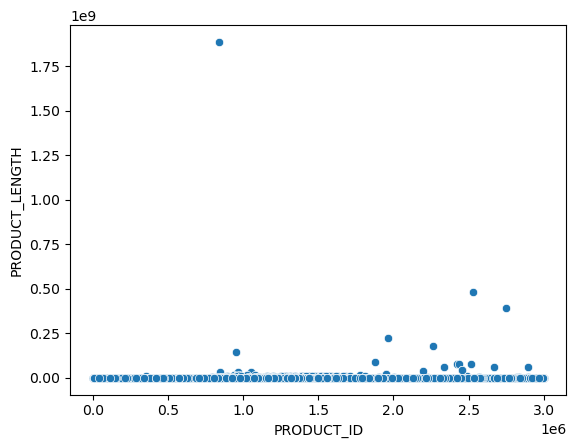

In [26]:
s.scatterplot(train_data['PRODUCT_ID'],train_data['PRODUCT_LENGTH'])

In [29]:
# s.barplot(train_data['PRODUCT_ID'],train_data['PRODUCT_LENGTH'])
train_data.corr()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
PRODUCT_ID,1.000000,0.250574,0.000424
PRODUCT_TYPE_ID,0.250574,1.000000,0.000961
PRODUCT_LENGTH,0.000424,0.000961,1.000000


#QnA:
1.which is dependent variable in dataset,why?
2.Any correlations between coloums if yes find strength?
3.Does this dataframe suitable for ml training
4.what is the most common value in description coloum?



#1 yes train_data has 1 dependent column and that is PRODUCT_LENGTH , as for every one it is must for them to know product length it must be predicted,and mostly 80%dependent will be in last

In [43]:
#2
# yes 
train_data.corr()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
PRODUCT_ID,1.000000,0.250574,0.000424
PRODUCT_TYPE_ID,0.250574,1.000000,0.000961
PRODUCT_LENGTH,0.000424,0.000961,1.000000


In [ ]:
#3
upto certain excent data set is suitable for ml training
but if we perform regreesion analysis it require only numerical 
so we need to futher modify this object values to integer for fitting into mode
we need to use nltk library for that string to int conversion for better efficiency.

In [61]:
#4
print(train_data['DESCRIPTION'].value_counts().index[0])
train_data['DESCRIPTION'].value_counts().values[0]

this case is made up of hard polycarbonate plastic and printed on all 3 sides of back cover. this cover protects your mobile from scratches and bumps. this printed case gives premier look to your mobile.


8339

#conclusion

performing nlp on the dataset as next step 
so that this dataset will be best fit for ml model training or tuning..
